# Virtual Painter Program

### Application of Color Based Object Detection
### Application of Thresholding & Trackbars
### Contour Detection in OpenCV
### Deque Data Structure (Double Ended Queue)

### Application of Color Based Object Detection

Color-based object detection is a technique used to identify and track objects in an image or video based on their color.

How it works:
- It involves converting the image to a color space like HSV (Hue, Saturation, Value).
- Objects are identified by setting upper and lower color thresholds in this color space.
- Pixels within this color range are considered part of the object.

<hr>

### Application of Thresholding & Trackbars

#### Thresholding:

What it does:
- Thresholding sets a certain value as a threshold to separate objects or regions in an image.
- Pixels above/below this threshold are classified as white/black or set to a specific value.

Application:
- It's used here to create trackbars allowing the user to adjust upper and lower color thresholds for object detection in real-time.

#### Trackbars: 

What they are:
- Trackbars are GUI elements that allow users to interactively adjust parameters or values within an OpenCV window.

Functionality:
- They appear as sliding bars or controls within a window.
- Users can drag these controls to modify values, such as color thresholds, kernel sizes, or any adjustable parameter.

Application:
- Trackbars are used to provide real-time control and adjustment of variables or settings, often in image processing tasks.


<hr>

### Contour Detection in OpenCV

Contour detection identifies and outlines the shapes or objects within an image.

How it works:

- It identifies continuous lines that form the boundary of objects in an image.
- These contours are a list of points or vertices that describe the shape's boundary.

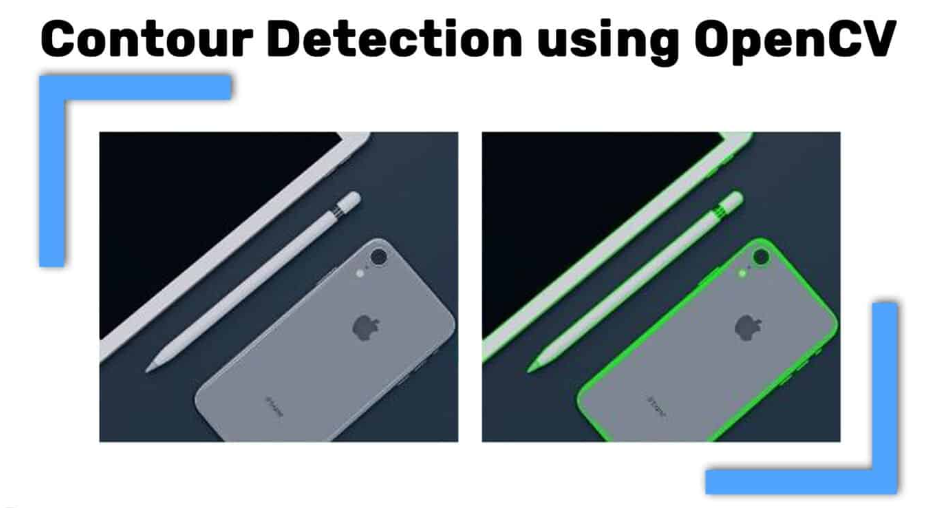

<hr>

### Deque Data Structure (Double Ended Queue)

A deque (double-ended queue) is a data structure that allows elements to be added or removed from both ends.

Features:

- Access: Elements can be added or removed from the front (left) or the back (right) of the queue.

- Flexibility: It's like a list, but it supports efficient insertion and deletion at both ends.

- Use Cases: Ideal for maintaining a list of recent points or data with a fixed maximum length (as in this code for storing color points).

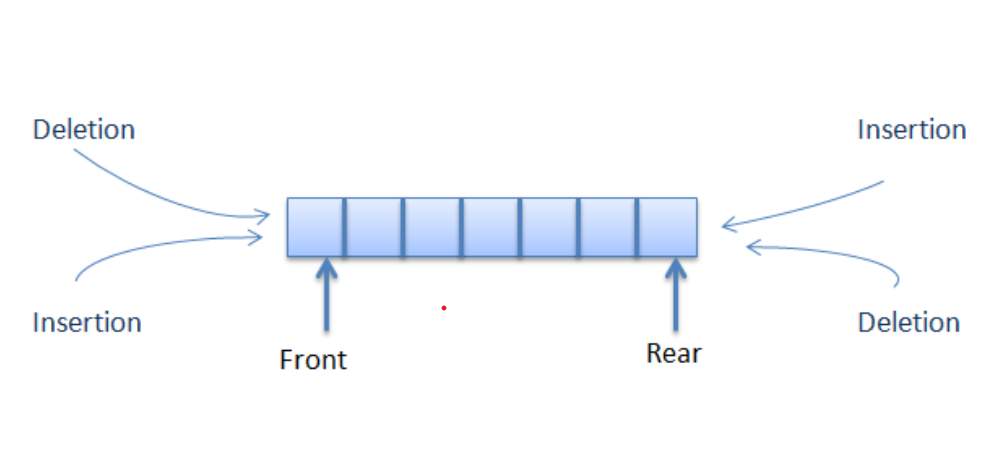

<hr>

### Complete Code

In [ ]:
import numpy as np
import cv2
from collections import deque

#default called trackbar function 
def setValues(x):
   print("")


# Creating the trackbars needed for adjusting the marker colour
cv2.namedWindow("Color detectors")
cv2.createTrackbar("Upper Hue", "Color detectors", 153, 180,setValues)
cv2.createTrackbar("Upper Saturation", "Color detectors", 255, 255,setValues)
cv2.createTrackbar("Upper Value", "Color detectors", 255, 255,setValues)
cv2.createTrackbar("Lower Hue", "Color detectors", 64, 180,setValues)
cv2.createTrackbar("Lower Saturation", "Color detectors", 72, 255,setValues)
cv2.createTrackbar("Lower Value", "Color detectors", 49, 255,setValues)


# Giving different arrays to handle colour points of different colour
bpoints = [deque(maxlen=1024)]
gpoints = [deque(maxlen=1024)]
rpoints = [deque(maxlen=1024)]
ypoints = [deque(maxlen=1024)]

# These indexes will be used to mark the points in particular arrays of specific colour
blue_index = 0
green_index = 0
red_index = 0
yellow_index = 0

#The kernel to be used for dilation purpose 
kernel = np.ones((5,5),np.uint8)

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255)]
colorIndex = 0

# Here is code for Canvas setup
paintWindow = np.zeros((471,636,3)) + 255
paintWindow = cv2.rectangle(paintWindow, (40,1), (140,65), (0,0,0), 2)
paintWindow = cv2.rectangle(paintWindow, (160,1), (255,65), colors[0], -1)
paintWindow = cv2.rectangle(paintWindow, (275,1), (370,65), colors[1], -1)
paintWindow = cv2.rectangle(paintWindow, (390,1), (485,65), colors[2], -1)
paintWindow = cv2.rectangle(paintWindow, (505,1), (600,65), colors[3], -1)

cv2.putText(paintWindow, "CLEAR", (49, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "BLUE", (185, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "GREEN", (298, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "RED", (420, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "YELLOW", (520, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (150,150,150), 2, cv2.LINE_AA)
cv2.namedWindow('Paint', cv2.WINDOW_AUTOSIZE)


# Loading the default webcam of PC.
cap = cv2.VideoCapture(0)

# Keep looping
while True:
    # Reading the frame from the camera
    ret, frame = cap.read()
    #Flipping the frame to see same side of yours
    frame = cv2.flip(frame, 1)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


    u_hue = cv2.getTrackbarPos("Upper Hue", "Color detectors")
    u_saturation = cv2.getTrackbarPos("Upper Saturation", "Color detectors")
    u_value = cv2.getTrackbarPos("Upper Value", "Color detectors")
    l_hue = cv2.getTrackbarPos("Lower Hue", "Color detectors")
    l_saturation = cv2.getTrackbarPos("Lower Saturation", "Color detectors")
    l_value = cv2.getTrackbarPos("Lower Value", "Color detectors")
    Upper_hsv = np.array([u_hue,u_saturation,u_value])
    Lower_hsv = np.array([l_hue,l_saturation,l_value])


    # Adding the colour buttons to the live frame for colour access
    frame = cv2.rectangle(frame, (40,1), (140,65), (122,122,122), -1)
    frame = cv2.rectangle(frame, (160,1), (255,65), colors[0], -1)
    frame = cv2.rectangle(frame, (275,1), (370,65), colors[1], -1)
    frame = cv2.rectangle(frame, (390,1), (485,65), colors[2], -1)
    frame = cv2.rectangle(frame, (505,1), (600,65), colors[3], -1)
    cv2.putText(frame, "CLEAR ALL", (49, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "BLUE", (185, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "GREEN", (298, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "RED", (420, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "YELLOW", (520, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (150,150,150), 2, cv2.LINE_AA)


    # Identifying the pointer by making its mask
    Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
    Mask = cv2.erode(Mask, kernel, iterations=1)
    Mask = cv2.morphologyEx(Mask, cv2.MORPH_OPEN, kernel)
    Mask = cv2.dilate(Mask, kernel, iterations=1)

    # Find contours for the pointer after idetifying it
    cnts,_ = cv2.findContours(Mask.copy(), cv2.RETR_EXTERNAL,
    	cv2.CHAIN_APPROX_SIMPLE)
    center = None

    # Ifthe contours are formed
    if len(cnts) > 0:
    	# sorting the contours to find biggest 
        cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
        # Get the radius of the enclosing circle around the found contour
        ((x, y), radius) = cv2.minEnclosingCircle(cnt)
        # Draw the circle around the contour
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
        # Calculating the center of the detected contour
        M = cv2.moments(cnt)
        center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))

        # Now checking if the user wants to click on any button above the screen 
        if center[1] <= 65:
            if 40 <= center[0] <= 140: # Clear Button
                bpoints = [deque(maxlen=512)]
                gpoints = [deque(maxlen=512)]
                rpoints = [deque(maxlen=512)]
                ypoints = [deque(maxlen=512)]

                blue_index = 0
                green_index = 0
                red_index = 0
                yellow_index = 0

                paintWindow[67:,:,:] = 255
            elif 160 <= center[0] <= 255:
                    colorIndex = 0 # Blue
            elif 275 <= center[0] <= 370:
                    colorIndex = 1 # Green
            elif 390 <= center[0] <= 485:
                    colorIndex = 2 # Red
            elif 505 <= center[0] <= 600:
                    colorIndex = 3 # Yellow
        else :
            if colorIndex == 0:
                bpoints[blue_index].appendleft(center)
            elif colorIndex == 1:
                gpoints[green_index].appendleft(center)
            elif colorIndex == 2:
                rpoints[red_index].appendleft(center)
            elif colorIndex == 3:
                ypoints[yellow_index].appendleft(center)
    # Append the next deques when nothing is detected to avois messing up
    else:
        bpoints.append(deque(maxlen=512))
        blue_index += 1
        gpoints.append(deque(maxlen=512))
        green_index += 1
        rpoints.append(deque(maxlen=512))
        red_index += 1
        ypoints.append(deque(maxlen=512))
        yellow_index += 1

    # Draw lines of all the colors on the canvas and frame 
    points = [bpoints, gpoints, rpoints, ypoints]
    for i in range(len(points)):
        for j in range(len(points[i])):
            for k in range(1, len(points[i][j])):
                if points[i][j][k - 1] is None or points[i][j][k] is None:
                    continue
                cv2.line(frame, points[i][j][k - 1], points[i][j][k], colors[i], 2)
                cv2.line(paintWindow, points[i][j][k - 1], points[i][j][k], colors[i], 2)

    # Show all the windows
    cv2.imshow("Tracking", frame)
    cv2.imshow("Paint", paintWindow)
    cv2.imshow("mask",Mask)

	# If the 'q' key is pressed then stop the application 
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the camera and all resources
cap.release()
cv2.destroyAllWindows()

### Brief Explanation Of The Algorithm

- Start reading the frames and convert the captured frames to HSV colour space. (Easy for colour detection)
- Prepare the canvas frame and put the respective ink buttons on it. 
- Adjust the trackbar values for finding the mask of coloured marker.
- Preprocess the mask with morphological operations. (Erotion and dilation)
- Detect the contours, find the center coordinates of largest contour and keep storing them in the array for successive frames. (Arrays for drawing points on canvas)
- Finally draw the points stored in array on the frames and canvas.

<hr>
<hr>